<a href="https://colab.research.google.com/github/capt-alien/DS2.2_final_project/blob/master/tutorial2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation

from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")
    
# Import Tensorflow with multiprocessing
import tensorflow as tf
# import multiprocessing as mp

# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

# fix random seed for reproducibility
np.random.seed(1010)

Using TensorFlow backend.


In [3]:
# Train the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
# Here are the classes in the dataset. We'll be using this to
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

num_classes = len(class_names)
print(num_classes)

10


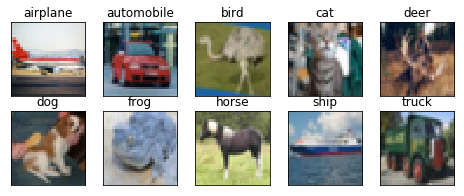

In [5]:
def visualize_classes():
    fig = plt.figure(figsize=(8,3))
    for i in range(num_classes):
        ax = fig.add_subplot(2, 5, 1+i, xticks=[], yticks=[])
        idx = np.where(y_train[:]==i)[0]
        features_idx = x_train[idx, ::]
        img_num = np.random.randint(features_idx.shape[0])
        im = np.transpose(features_idx[img_num, ::], (1,2,0))
        ax.set_title(class_names[i])
        plt.imshow(im)
    plt.show()
    
visualize_classes()

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [0]:
#encoding our output label

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation(tf.nn.softmax))

W0628 19:52:38.753244 140601645365120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0628 19:52:38.788251 140601645365120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 19:52:38.794325 140601645365120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0628 19:52:38.807485 140601645365120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0628 19:52:38.808353 1406016453

In [9]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

W0628 19:52:41.792739 140601645365120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 30, 30)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 30, 30)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 15, 15)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 15, 15)        18496     
__________

In [10]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

W0628 19:52:41.910268 140601645365120 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 186us/step - loss: 1.9366 - acc: 0.2865 - val_loss: 1.5603 - val_acc: 0.4326
Epoch 2/10
50000/50000 [==============================] - 5s 105us/step - loss: 1.4782 - acc: 0.4611 - val_loss: 1.2785 - val_acc: 0.5381
Epoch 3/10
50000/50000 [==============================] - 5s 106us/step - loss: 1.2752 - acc: 0.5430 - val_loss: 1.1158 - val_acc: 0.6031
Epoch 4/10
50000/50000 [==============================] - 5s 106us/step - loss: 1.1523 - acc: 0.5883 - val_loss: 1.0394 - val_acc: 0.6316
Epoch 5/10
50000/50000 [==============================] - 5s 106us/step - loss: 1.0551 - acc: 0.6252 - val_loss: 0.9434 - val_acc: 0.6648
Epoch 6/10
50000/50000 [==============================] - 5s 106us/step - loss: 0.9742 - acc: 0.6544 - val_loss: 0.8721 - val_acc: 0.6906
Epoch 7/10
50000/50000 [==============================] - 5s 106us/step - loss: 0.9084 - acc: 0.6759 - val_loss: 0.8212 - 

In [12]:
y_predicts = model.predict_classes(x_test)
y_predicts

array([3, 8, 8, ..., 5, 1, 7])

In [0]:
y_test_argmax =np.argmax(y_test, axis=1)


In [14]:
total_count = len(y_test_argmax)
correct_count = 0
incorrect_count = 0
for num in range(len(y_test_argmax) -1):
    if y_test_argmax[num] == y_predicts[num]:
        correct_count += 1
    else:
        incorrect_count += 1

percentage_correct = correct_count/total_count
percentage_incorrect = incorrect_count/total_count
'The percentage of correctly classified pictures is {}. The percentage of correctly  classified pictures is {}'.format(percentage_correct*100,percentage_incorrect*100)


'The percentage of correctly classified pictures is 75.02. The percentage of correctly  classified pictures is 24.97'